In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [172]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv


--2024-10-07 23:24:18--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 298573 (292K) [text/plain]
Сохранение в: «laptops.csv.1»

laptops.csv.1       100%[===================>] 291,58K   940KB/s    за 0,3s    

2024-10-07 23:24:20 (940 KB/s) - «laptops.csv.1» сохранён [298573/298573]



In [190]:
df = pd.read_csv('laptops.csv')

In [202]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [203]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [214]:
cols = ['ram',
'storage',
'screen',
'final_price']

In [215]:
df = df[cols]

<Axes: xlabel='final_price', ylabel='Count'>

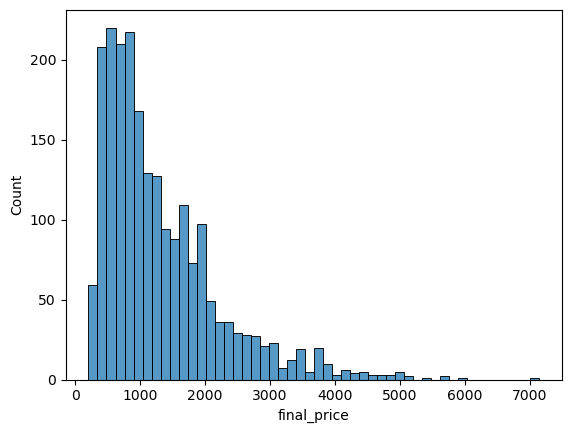

In [216]:
sns.histplot(df.final_price, bins=50)

In [217]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [218]:
df.ram.median()

16.0

In [219]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [220]:
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [221]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [222]:
def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [223]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [224]:
y_pred = w_0 + X_train.dot(w)

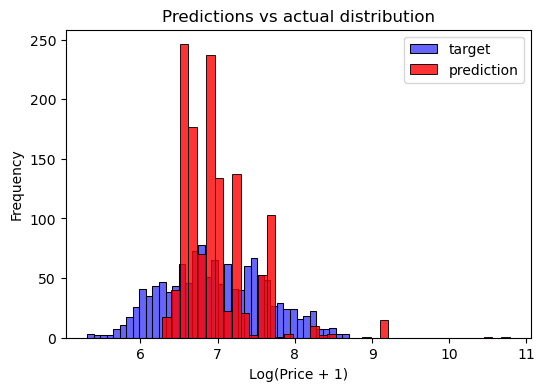

In [225]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [226]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [227]:
score = rmse(y_train, y_pred)

In [228]:
round(score, 2)

0.45

In [229]:
def prepare_X(df):
    df_num = df.fillna(df.screen.mean())
    X = df_num.values
    return X

In [230]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [231]:
y_pred = w_0 + X_train.dot(w)

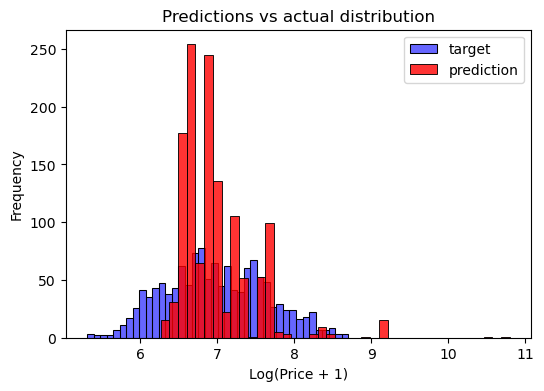

In [232]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [233]:
score = rmse(y_train, y_pred)

In [234]:
round(score, 2)

0.45

In [235]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [236]:
X_train = prepare_X(df_train)

In [237]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=0)
    y_pred = w_0 + X_train.dot(w)
    print('train', round(rmse(y_train, y_pred), 3))
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    print('val', round(rmse(y_val, y_pred), 3))
    print('%5s, %.2f' % (r, w_0))

train 0.446
val 0.431
    0, 6.86
train 0.446
val 0.431
 0.01, 6.86
train 0.446
val 0.431
  0.1, 6.86
train 0.446
val 0.431
    1, 6.86
train 0.446
val 0.431
    5, 6.86
train 0.446
val 0.431
   10, 6.86
train 0.446
val 0.431
  100, 6.86


In [238]:
results = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.final_price.values
    y_val_orig = df_val.final_price.values
    y_test_orig = df_test.final_price.values

    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)
    y_test = np.log1p(df_test.final_price.values)

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    def train_linear_regression(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])
        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w = XTX_inv.dot(X.T).dot(y)
        return w[0], w[1:]
    
    def prepare_X(df):
        df_num = df.fillna(0)
        X = df_num.values
        return X

    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    
    y_pred = w_0 + X_train.dot(w)
    score = rmse(y_train, y_pred)
    results.append(score)
    

In [239]:
round(np.std(results), 3)

0.005